In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt

In [2]:
#Reading Excel
df = pd.read_excel(r'98100485.xlsx')

In [3]:
# Filtering the DataFrame to include only rows where 'GEO' is 'Canada'
# This step is performed because the data for 'Canada' contains information that is the sum of values for all other locations
df2 = df[df['GEO'] == 'Canada'].copy()

In [4]:
# Drop specific columns
columns_to_delete = ['Symbol', 'Symbol.1', 'Symbol.2', 'Coordinate', 'DGUID']
df2 = df2.drop(columns=columns_to_delete)

# Drop rows with any null values
df2 = df2.dropna()

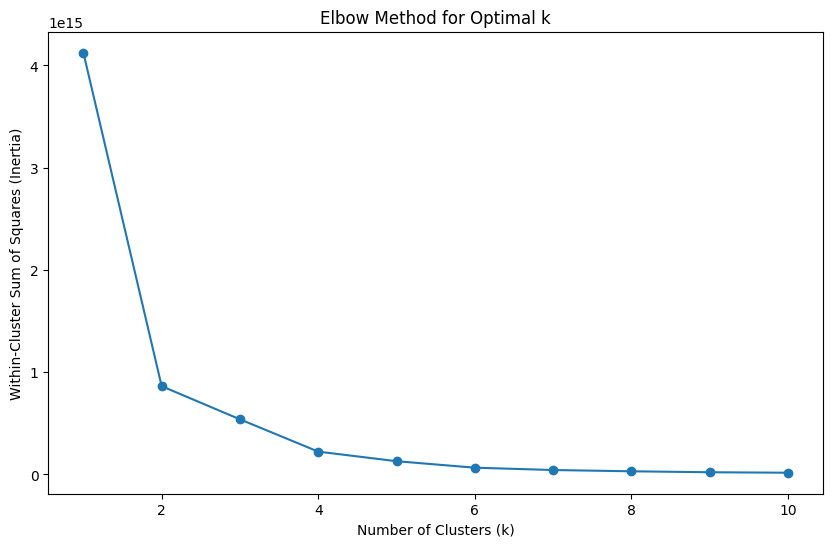

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


numeric_columns = ['Men', 'Women', 'Total - Gender']
X = df2[numeric_columns]


non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns

# Drop non-numeric columns
X = X.drop(columns=non_numeric_columns)

# Randomly defining the range of k values to test
k_values = range(1, 11)  
from sklearn.cluster import KMeans

# Set n_init explicitly to suppress the warning
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

# Calculate the inertia for different k values
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)


# Plot the Elbow Method curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()


In [6]:
# Separate numerical and categorical features
numeric_columns = ['Men', 'Women', 'Total - Gender']
categorical_columns = ['Labour force status (8)', 'Age']
X_numeric = df2[numeric_columns]

In [7]:
# One-hot encode categorical variables
X_categorical = pd.get_dummies(df2[categorical_columns])

# Concatenate numerical and encoded categorical features
X = pd.concat([X_numeric, X_categorical], axis=1)

# Standardize numerical features
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Identify indices of categorical columns for KPrototypes
categorical_indices = [X.columns.get_loc(col) for col in X_categorical.columns]

# Perform KPrototypes clustering with k=2 because we found K value from the above test
kproto = KPrototypes(n_clusters=2, init='Cao', verbose=2)
clusters = kproto.fit_predict(X.values, categorical=categorical_indices)

# Add cluster labels to the original DataFrame
df2['Cluster'] = clusters

# Display the cluster sizes
print(df2['Cluster'].value_counts())


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 13, ncost: 196.72526791316295
Run: 1, iteration: 2/100, moves: 1, ncost: 195.60926807602877
Run: 1, iteration: 3/100, moves: 0, ncost: 195.60926807602877
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1, ncost: 195.60926807602883
Run: 2, iteration: 2/100, moves: 0, ncost: 195.60926807602883
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 3, ncost: 195.6092680760288
Run: 3, iteration: 2/100, moves: 0, ncost: 195.6092680760288
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 1, ncost: 195.6092680760

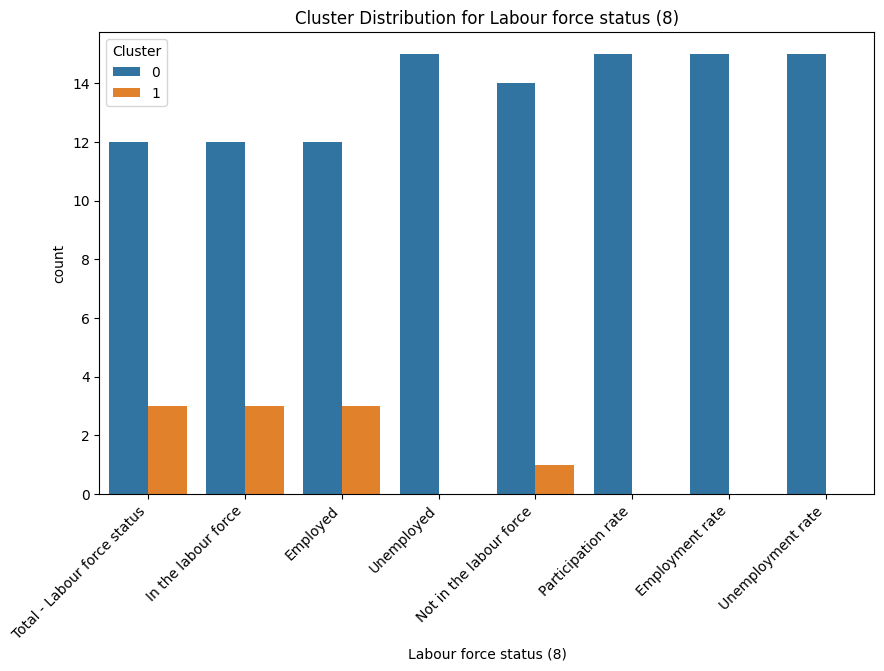

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame after clustering
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='Labour force status (8)', hue='Cluster', data=df2)
plt.title('Cluster Distribution for Labour force status (8)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()



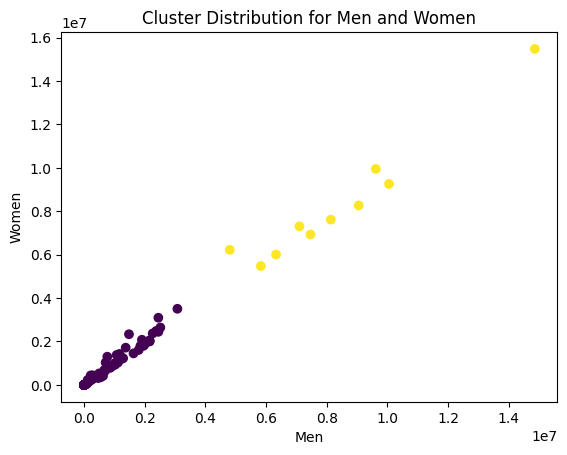

In [9]:

plt.scatter(df2['Men'], df2['Women'], c=df2['Cluster'], cmap='viridis')
plt.xlabel('Men')
plt.ylabel('Women')
plt.title('Cluster Distribution for Men and Women')
plt.show()


In [10]:

cluster_1_data = df2[df2['Cluster'] == 0]
cluster_2_data = df2[df2['Cluster'] == 1]

# Display information for Cluster 1
print("Cluster 1 Information:")
print(cluster_1_data.describe())  
print(cluster_1_data.head())      

# Display information for Cluster 2
print("\nCluster 2 Information:")
print(cluster_2_data.describe())  
print(cluster_2_data.head())      


Cluster 1 Information:
       REF_DATE  Total - Gender           Men         Women  Cluster
count     110.0    1.100000e+02  1.100000e+02  1.100000e+02    110.0
mean     2021.0    1.175557e+06  5.789072e+05  5.966677e+05      0.0
std         0.0    1.603353e+06  7.840558e+05  8.258894e+05      0.0
min      2021.0    4.500000e+00  6.800000e+00  2.600000e+00      0.0
25%      2021.0    6.235000e+01  6.560000e+01  6.082500e+01      0.0
50%      2021.0    3.157075e+05  1.470450e+05  1.541675e+05      0.0
75%      2021.0    2.021942e+06  1.032885e+06  9.882762e+05      0.0
max      2021.0    6.586600e+06  3.079765e+06  3.506840e+06      0.0
   REF_DATE     GEO      Labour force status (8)             Age   
1      2021  Canada  Total - Labour force status  15 to 24 years  \
2      2021  Canada  Total - Labour force status  15 to 19 years   
3      2021  Canada  Total - Labour force status  20 to 24 years   
6      2021  Canada  Total - Labour force status  25 to 34 years   
7      2021  Can